# Embedding Visualization (Only used for small batch of data)

# Loading the embedding from the language model

In [3]:
import numpy as np
import scipy.sparse as sp
import scipy.io as io
import pickle

import pandas as pd
import re
import umap
import umap.plot
from datasets import load_dataset


2024-01-31 22:10:43.078183: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-31 22:10:43.078235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
def adj_umap(split, embedding):
    # split = "train"
    # embedding = "NT"
    sparse = io.mmread(f'../../data/{embedding}_{split}_feature_table.mtx')
    df = pd.DataFrame.sparse.from_spmatrix(sparse)
    labels = pickle.load(open(f"../../data/{embedding}_{split}_labels.pkl", "rb"))
    Rlabels = pickle.load(open(f"../../data/{embedding}_{split}_Rlabels.pkl","rb"))
    df["Labels"]=labels
    df["RLabels"] = Rlabels
    mapper = umap.UMAP(n_neighbors = 100, min_dist = 0.1).fit(df.loc[:, ~df.columns.isin(["Labels", "RLabels"])])
    fig = umap.plot.points(mapper, labels=df["Labels"], color_key_cmap='tab20')
    fig.figure.savefig(f"/home/sxr280/BERTLocRNA/output/RNAlocalization/Figure/{embedding}_{split}_adjumap.png", dpi = 300)



/tmp/ipykernel_712662/3023318138.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Labels"]=labels
/tmp/ipykernel_712662/3023318138.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RLabels"] = Rlabels


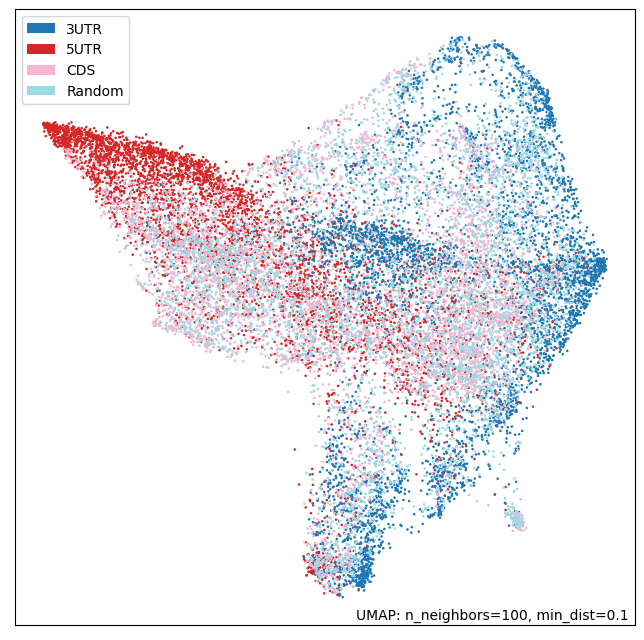

In [4]:
adj_umap(split = "train", embedding = "DNABERT2")